# Fragestellugn und Datenbeschaffung

### 1.1 Titel:

Diabetes_ 1

### 1.2 Fragestellung

- In wiefern beeinflusst der BMI das Risiko an Diabetes zu erkranken?



### 1.3 Datenquelle

https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes?resource=download

### 1.4 Daten beschaffen und laden

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch


In [91]:
df = pd.read_csv('data/Healthcare-Diabetes.csv')

## 2. Daten vorbereitung

### Beschreibung
Das Datenset enthält unterschiedliche Risikofakteroen, welche im Zusammenhang mit Diabetes auftauchen können und allgemeine Gesundheitsdaten, wie Alter, Geschlecht etc. Diese werden in Outcome definiert ob die Person Diabetes hat oder nicht durch 0 = kein Diabetes und 1= Diabetes. Demensprechen ist es uns möglich auf Grund unseres Datensatzes festzu stellen, ob bestimmte Prameter ein erhöhtes Risiko auf Diabetes angeben. 
Das Datenset kann dazu eingesetzt werden personen früher zu diagnostizieren und eventuel auch präventive Massnahmen zu ergreifen.

Bei den Daten Handelt es sich immer um Diabetes Typ 2, da dieses Erworben wird im Alter. Bei Typ 1 handelt es isch um eine Autoimmunerkrankung gegen die Inselzellen der Bauchspeicheldrüse. 

Bei den Personen welche im Datenset sind ist es noch wichtig anzumerken: sie sind alle mit Risikofaktoren zu Diabetes in dem Datenset, es handelt sich nicht um komplett gesunde Menschen.

### 2.1 Analyse
- Die Roh-Daten sind im Long-Format
- Jede Spalte ist ein Patient, dessen Daten wiedergeben werden
- Steht eine Null sind die Daten nicht erfasst worden


In [92]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## 3. Rohdatenanalyse



### 3.1 Allgemein

- Wir haben Id, Schwangerschaften, Glucose, Blutdruck, Dicke der Haut, Insulin, BMI, Risiko auf Diabetes in bezug auf die Familien Geschichte, Alter, Resultat (Diabetes Ja/Nein)
- 2768 Patienten Daten sind im Daten-Set 

In [93]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [94]:
df.shape

(2768, 10)

### 3.2 BMI
Es ist einfach zu erkennen, das die Personen tendenziell einen erhöhten BMI aufweisen. 
Der Druchschnitts BMI aus dem Datenset ist: 32.1374

In [95]:
df["BMI"].mean()
print("BMI Durchschnitt: ",df["BMI"].mean())

BMI Durchschnitt:  32.13739161849711


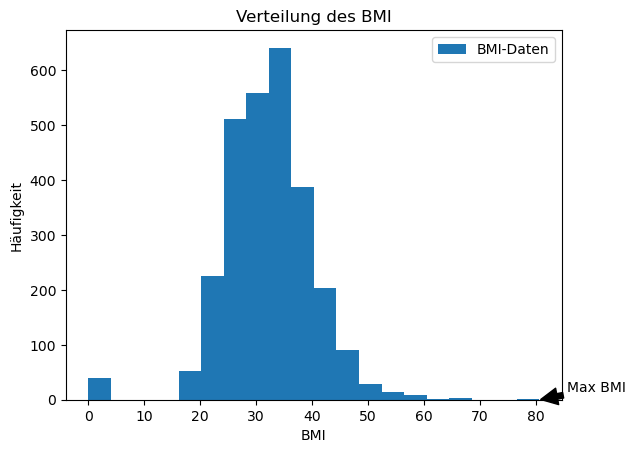

In [96]:
df["BMI"].plot(kind='hist', bins=20)

plt.title('Verteilung des BMI')
plt.xlabel('BMI')
plt.ylabel('Häufigkeit')
plt.legend(['BMI-Daten'], loc='upper right')
plt.annotate('Max BMI', xy=(df["BMI"].max(), 0), xytext=(df["BMI"].max() + 5, 15),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


Durch die Analyse im Diagramm konnte festgestellt werden, dass es Daten gibt welche gleich Null sind. So ist unser Durchschnitt nicht ganz korrekt. 
Es hat 39 Patienten welche den BMI nicht angegeben haben und der BMI somit gleich Null ist. 
Wenn man diese 39 Patienten aus dem Durchschnitt herausrechnet ist der neue Durchschnitt: 32.5966


In [97]:

def cout_unrealistic_bmi():
    bmi_count = 0
    for bmi in df["BMI"]:
        if bmi == 0:
            bmi_count = 1 + bmi_count
    print(bmi_count)

print("Anzahl unrealistischer BMI: ")
    
cout_unrealistic_bmi()


Anzahl unrealistischer BMI: 
39


In [98]:
df[df["BMI"] != 0]["BMI"].mean()
print("BMI Durchschnitt: ",df[df["BMI"] != 0]["BMI"].mean())

BMI Durchschnitt:  32.59666544521803


### 3.2 Blutdruck 

Der durchschnittliche Blutdruck liegt bei 72.40 ohne die die einen Null Wert eingetragen haben


In [99]:
df[df["BloodPressure"] != 0]["BloodPressure"].mean()

print("Blutdruck Durchschnitt: ",df[df["BloodPressure"] != 0]["BloodPressure"].mean())

Blutdruck Durchschnitt:  72.40408626560726


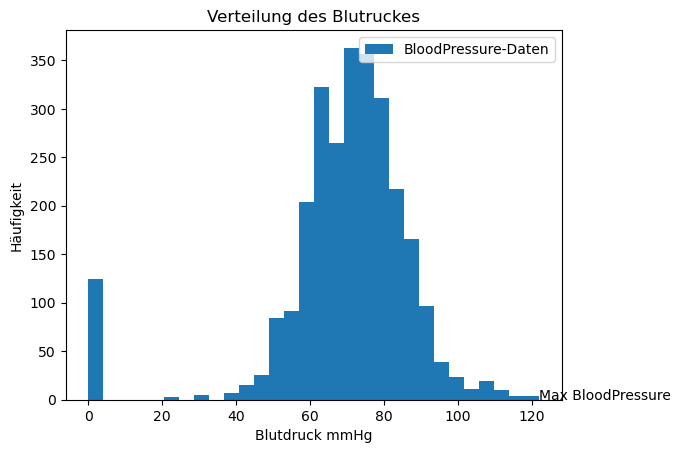

In [100]:
df["BloodPressure"].plot(kind='hist', bins=30)

plt.title('Verteilung des Blutruckes')
plt.xlabel('Blutdruck mmHg')
plt.ylabel('Häufigkeit')
plt.legend(['BloodPressure-Daten'], loc='upper right')
plt.annotate('Max BloodPressure', xy=(df["BloodPressure"].max(), 0))

plt.show()

### 3.3 Alter
Das Durchschnittsalter der Patienten ist 33 Jahre
Es hat sehr viele sehr junge Patienten die den Altersdurchschnitt sehr runterziehen.

In [101]:
df[df["Age"] != 0]["Age"].mean()

print("Alters Durchschnitt: ",df[df["Age"] != 0]["Age"].mean())

Alters Durchschnitt:  33.13222543352601


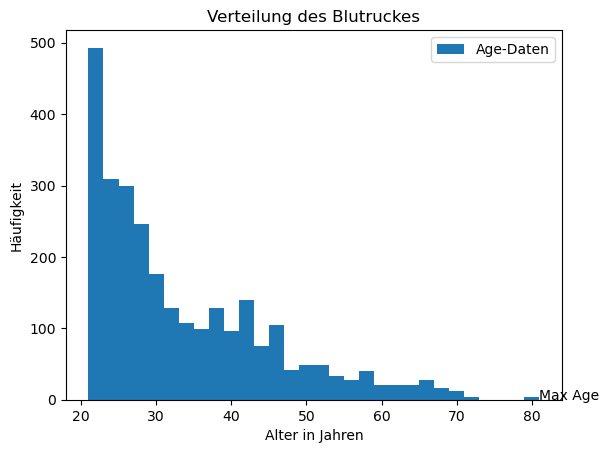

In [102]:
df["Age"].plot(kind='hist', bins=30)

plt.title('Verteilung des Blutruckes')
plt.xlabel('Alter in Jahren')
plt.ylabel('Häufigkeit')
plt.legend(['Age-Daten'], loc='upper right')
plt.annotate('Max Age', xy=(df["Age"].max(), 0))

plt.show()

### 3.4 Resultate

In den Patienten Daten haben 34.4% der Patienten Diabates. 65.6% der Patienten leider nicht an Diabetes.

In [103]:
def sum_of_positive ():
    positive = 0
    for result in df["Outcome"]:
        if result == 1:
            positive = positive + 1
    return positive

nr_of_positives = sum_of_positive()
total_outcomes = len(df["Outcome"])
precentage_positive = (nr_of_positives/total_outcomes)*100

print(precentage_positive)


34.39306358381503


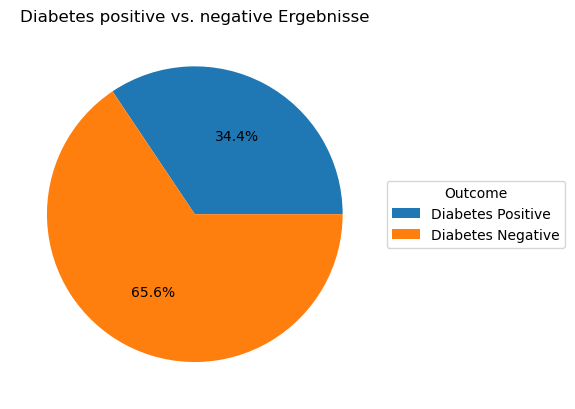

In [104]:
labels = "Diabetes Positive", "Diabetes Negative"
sizes = [nr_of_positives, total_outcomes - nr_of_positives]
fig,ax = plt.subplots()
ax.pie(sizes, autopct="%1.1f%%")

ax.legend(labels, title = "Outcome", loc= "center left", bbox_to_anchor=(1,0.5))
ax.set_title("Diabetes positive vs. negative Ergebnisse")

plt.show()


## 4. Zweites Datenset

### 4.1 Quelle

https://ourworldindata.org/grapher/diabetes-prevalence

### 4.2 Date laden

In [105]:
data_wordlwide = pd.read_csv('data/diabetes-prevalence.csv')

## 5. Datenvorbereitung

### Beschreibung
Die Datenquelle enthält Daten zur weltweiten Vertielung von Diabetes. Es enthält Daten zu 

### 5.1 Analyse

In [106]:
data_wordlwide.head()

,Entity,Code,Year,Diabetes prevalence (% of population ages 20 to 79)
0,Afghanistan,AFG,2011,7.6
1,Afghanistan,AFG,2021,10.9
2,Albania,ALB,2011,2.8
3,Albania,ALB,2021,10.2
4,Algeria,DZA,2011,7.0


In [107]:
data_wordlwide.dtypes

Entity                                                  object
Code                                                    object
Year                                                     int64
Diabetes prevalence (% of population ages 20 to 79)    float64
dtype: object

## Fragestellung 1

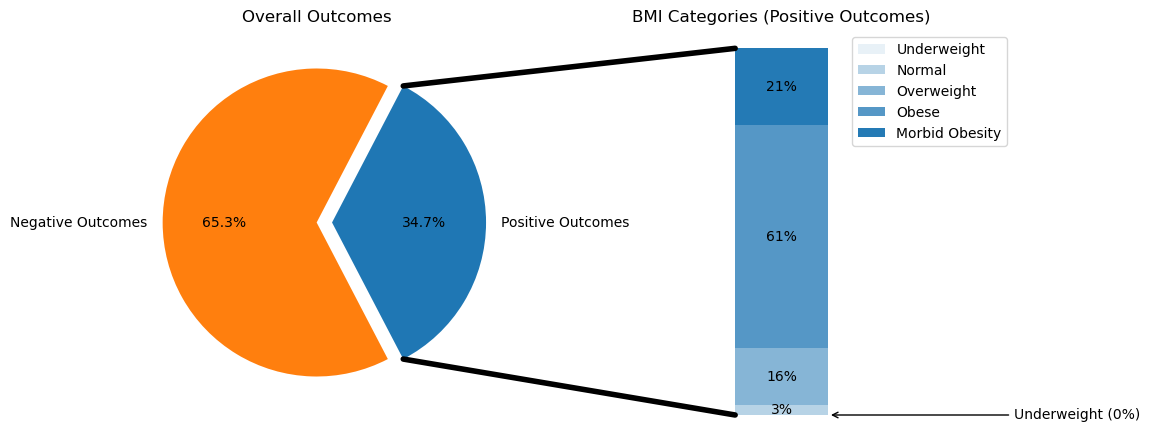

In [108]:


df = df[df['BMI'] > 0]

positive_count = (df['Outcome'] == 1).sum()
negative_count = (df['Outcome'] == 0).sum()
total = positive_count + negative_count

positive_ratio = positive_count / total
negative_ratio = negative_count / total

def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 40:
        return 'Obese'
    else:
        return 'Morbid Obesity'

positive_df = df[df['Outcome'] == 1].copy()
positive_df['BMI_Category'] = positive_df['BMI'].apply(get_bmi_category)

bmi_counts = positive_df['BMI_Category'].value_counts()
bmi_ratios = bmi_counts / bmi_counts.sum()

bmi_categories_order = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Morbid Obesity']
bmi_ratios_ordered = [bmi_ratios.get(cat, 0) for cat in bmi_categories_order]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.subplots_adjust(wspace=0)

labels = ['Positive Outcomes', 'Negative Outcomes']
ratios = [positive_ratio, negative_ratio]
explode = [0.1, 0]
angle = -180 * ratios[0]

wedges, *_ = ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=['C0', 'C1'])
ax1.set_title("Overall Outcomes")

width = 0.2
bottom = 0

for j, (height, category) in enumerate(zip(bmi_ratios_ordered, bmi_categories_order)):
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0',
                 alpha=0.1 + 0.22 * j, label=category)
    label_text = f"{category} ({height:.0%})"
    bar_center = bottom + height / 2.0
    
    if height < 0.02:
        ax2.annotate(
            label_text,                      
            xy=(0 + width/2, bar_center),    
            xytext=(0.5, bar_center),        
            arrowprops=dict(arrowstyle="->", lw=1),
            va='center'
        )
    else:
        ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    
    bottom += height

ax2.set_title("BMI Categories (Positive Outcomes)")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

positive_wedge = wedges[0]
theta1, theta2 = positive_wedge.theta1, positive_wedge.theta2
center, r = positive_wedge.center, positive_wedge.r
bar_height = sum(bmi_ratios_ordered)

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()